## Basic Data Cleaning and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Import file and look at its main features

In [6]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
print(customer_df.shape)
customer_df.head()

(9134, 24)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
print(customer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [43]:
# There is no null values in the dataFrame because. There are 9134 values/rows in each column.

### 2. Rename columns with the PEP 8 (snake case)
- Python Enhancement Proposal 8

In [12]:
pd.set_option('display.max_columns', None)
customer_df.columns = customer_df.columns.str.replace(' ', '_').str.lower()
customer_df.head(3)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


### 3. Fix data types
- date column to datetime format

In [37]:
pd.reset_option('display.max_columns', None)
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df.head(3)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [36]:
print(customer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

### 4. Correlation matrix observations

<Axes: >

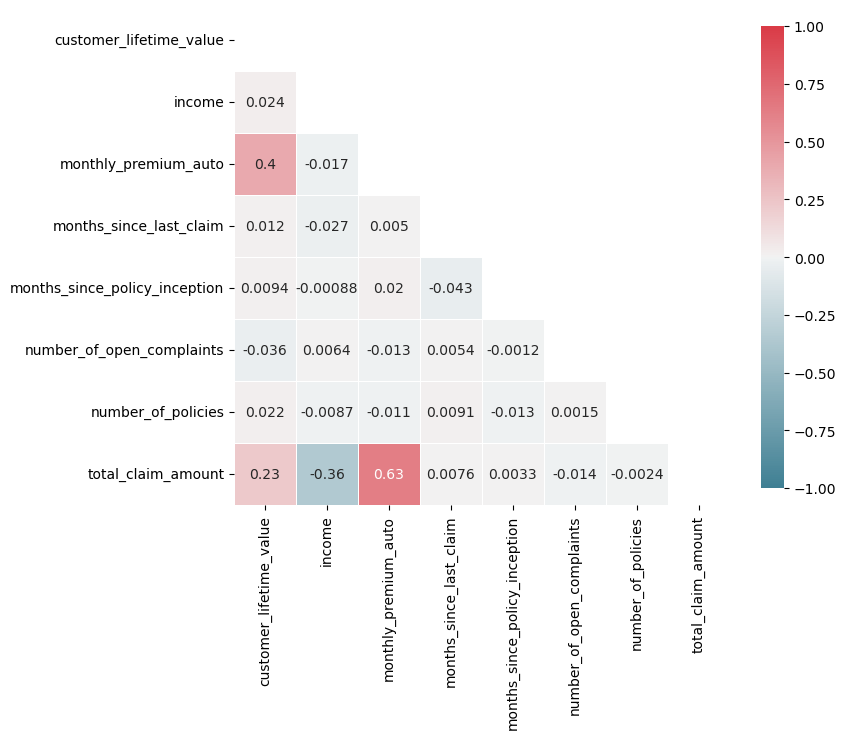

In [40]:
corr = customer_df.select_dtypes(np.number).corr()
mask = np.triu(np.ones_like(corr, dtype = bool))                                 
cmap = sns.diverging_palette(2020, 10, as_cmap = True)                          
plt.figure(figsize = (8, 8))                                                     
sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, annot = True,
            square = True, linewidths = 0.5, cbar_kws = {'shrink' : 0.75})

In [42]:
# total_claim_amount is strongly related to monthly_premium_auto
# total_claim_amount is also related to customer_lifetime_value
# And finally, customer_lifetime_value is related to monthly_premium_auto

### 5. Continuous variable plots

In [68]:
numerical_df = customer_df[customer_df.select_dtypes('number').columns]

In [65]:
continuos_columns = numerical_df[['customer_lifetime_value', 'total_claim_amount']]
continuos_columns.head()

,customer_lifetime_value,total_claim_amount
0,2763.519279,384.811147
1,6979.535903,1131.464935
2,12887.431650,566.472247
3,7645.861827,529.881344
4,2813.692575,138.130879


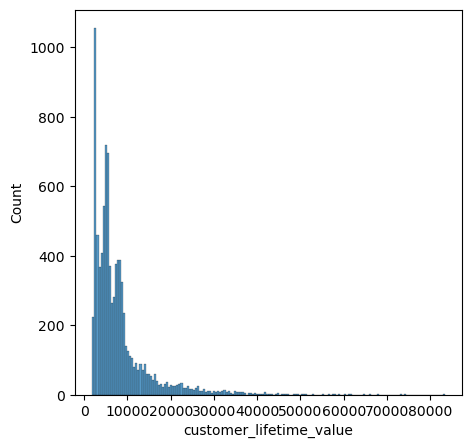

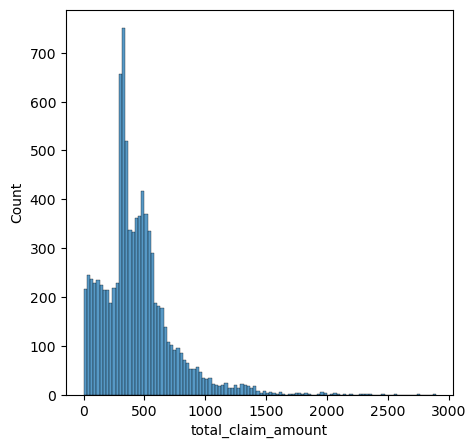

In [119]:
for column in continuos_columns:
    plt.figure(figsize=(5,5))
    sns.histplot(numerical_df[column])
    plt.show()

In [ ]:
# Both variables have a bias to the left, because they have many outliers.

### 6. Categorical variable plots

In [90]:
categorical_df = customer_df[customer_df.select_dtypes('object').columns]
categorical_df.drop(['customer'], axis=1, inplace=True)
categorical_df.head()

C:\Users\Daniel Castañeda\AppData\Local\Temp\ipykernel_34840\3315549407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df.drop(['customer'], axis=1, inplace=True)


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


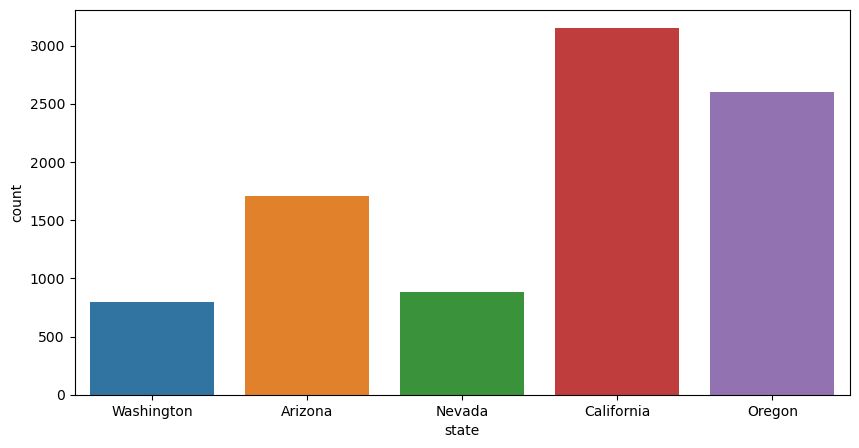

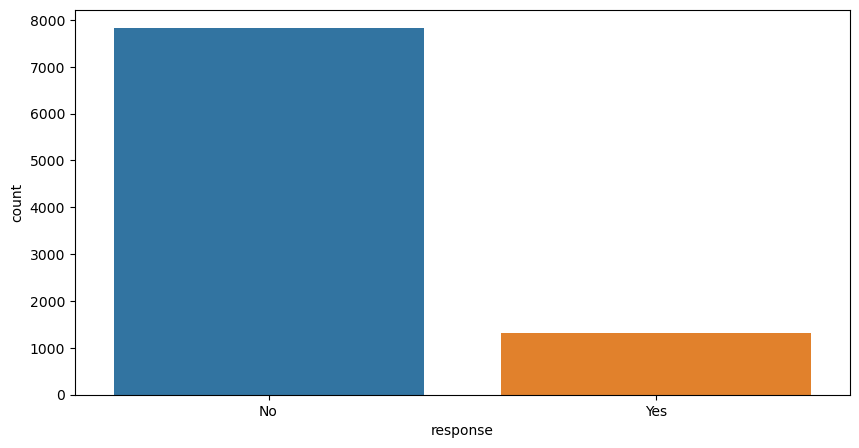

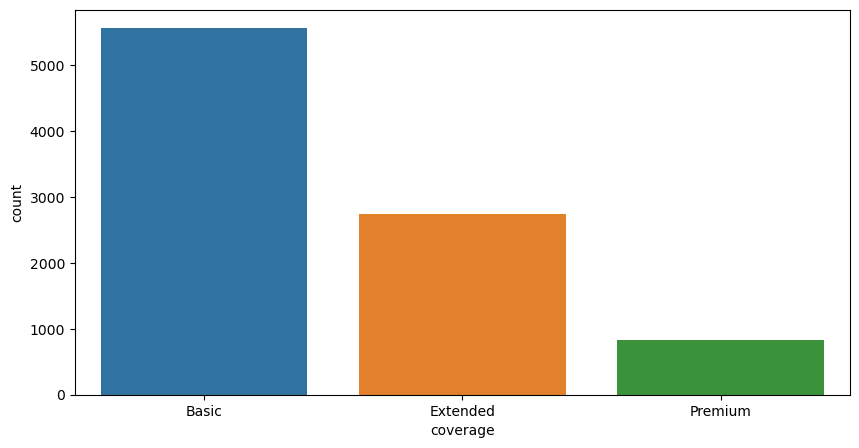

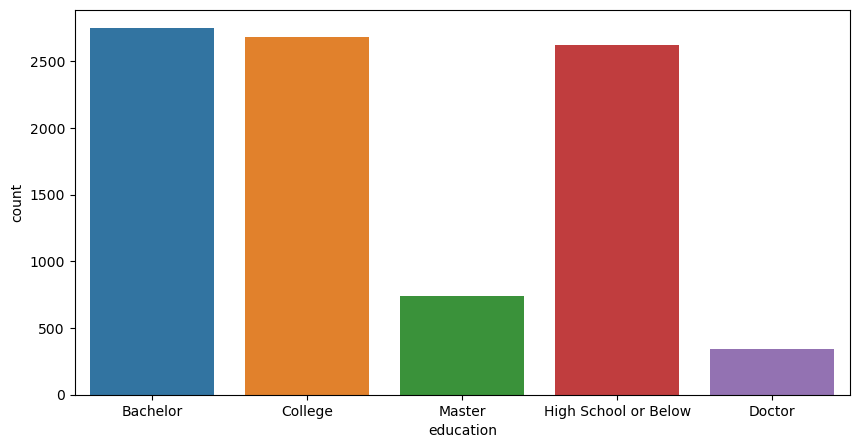

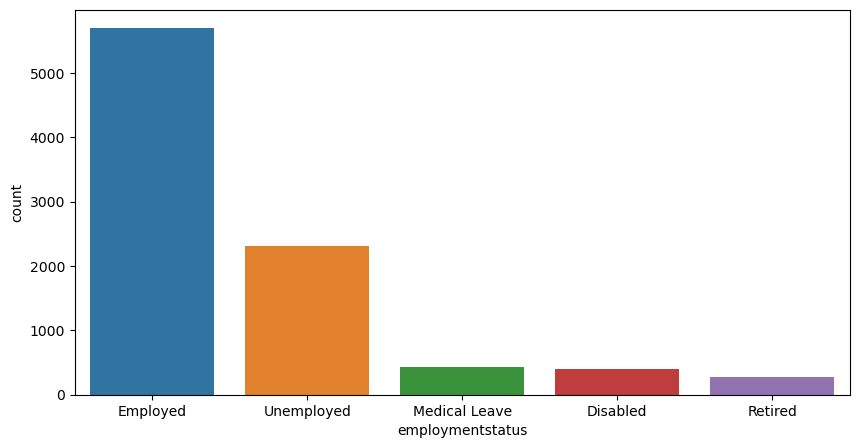

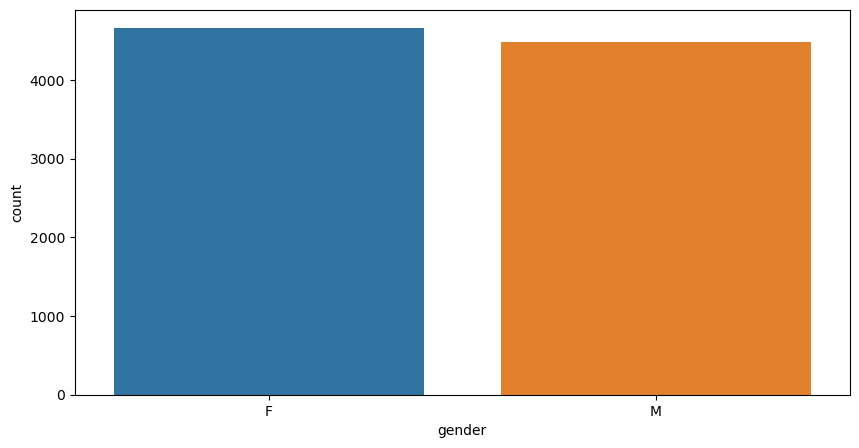

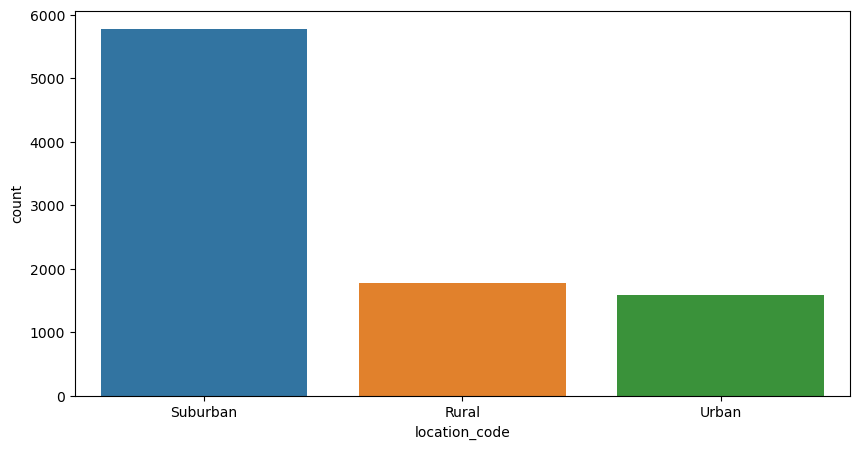

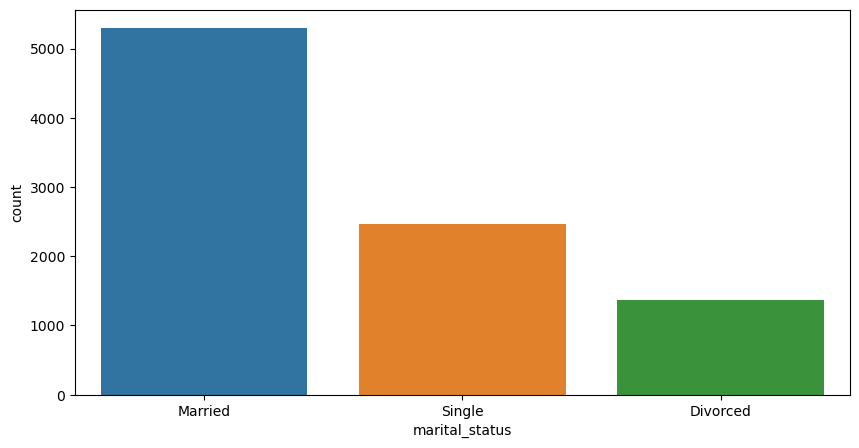

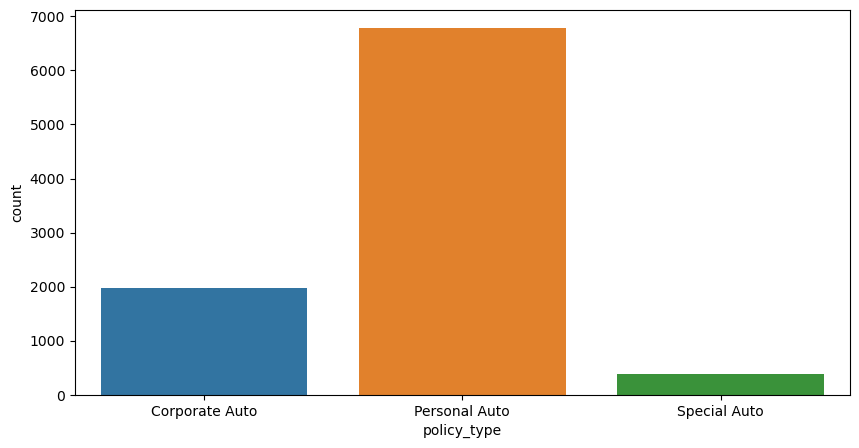

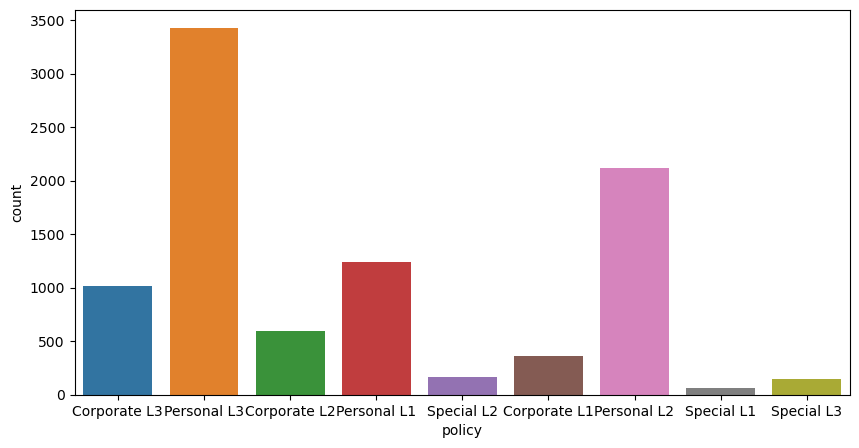

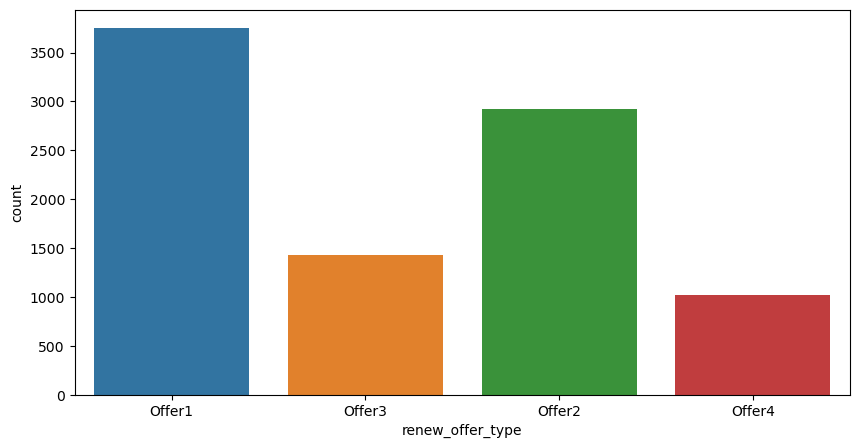

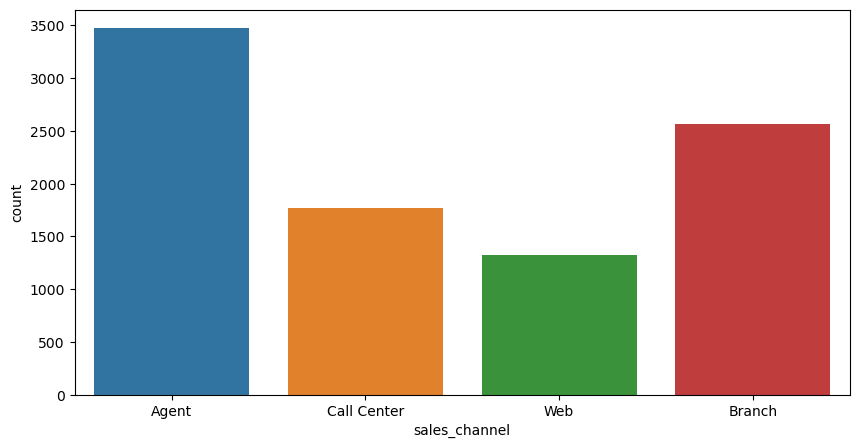

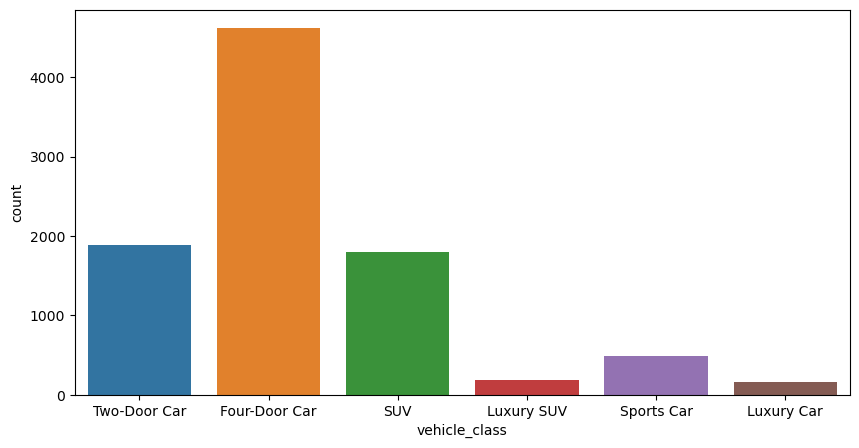

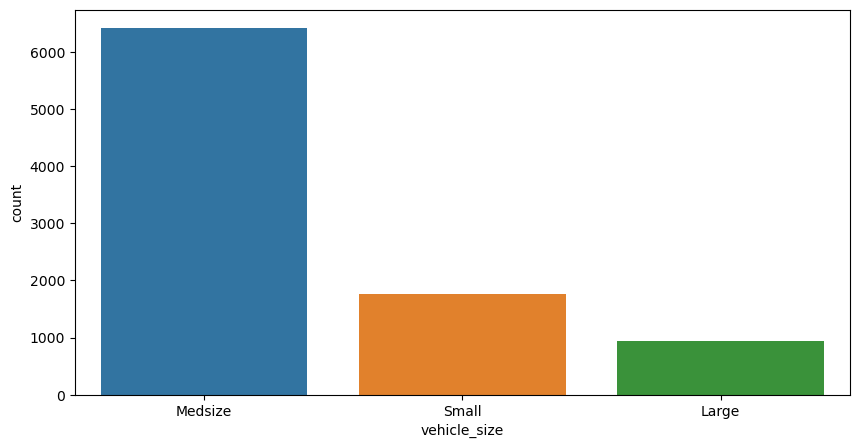

In [108]:
for column in categorical_df:
    plt.figure(figsize=(10,5))
    sns.countplot(data=categorical_df, x=column)
    plt.show()

### 7. Checking outliers

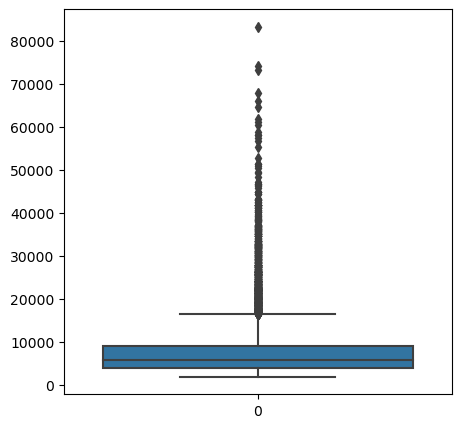

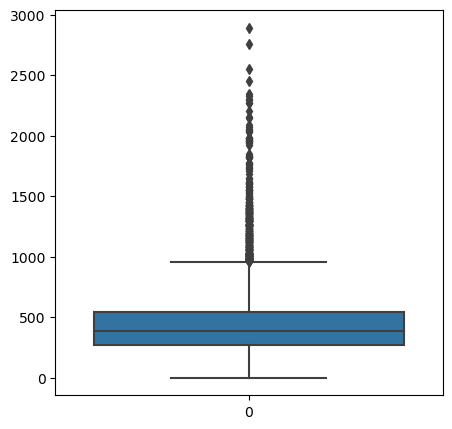

In [122]:
for column in continuos_columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(numerical_df[column])
    plt.show()

In [129]:
continuos_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [135]:
q1=np.percentile(continuos_columns['customer_lifetime_value'], 25)
q3=np.percentile(continuos_columns['customer_lifetime_value'], 75)
iqr=q3-q1

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

iqr, upper_limit, lower_limit

(4967.915247000001, 16414.039911750002, -3457.6210762500014)

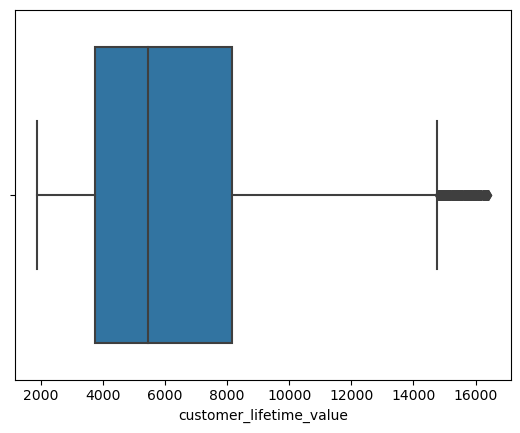

In [137]:
data = continuos_columns[(continuos_columns['customer_lifetime_value']>lower_limit) & (continuos_columns['customer_lifetime_value']<upper_limit)]
sns.boxplot(x=data['customer_lifetime_value'])
plt.show()

In [138]:
q1=np.percentile(continuos_columns['total_claim_amount'], 25)
q3=np.percentile(continuos_columns['total_claim_amount'], 75)
iqr=q3-q1

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

iqr, upper_limit, lower_limit

(275.25659425, 960.3997301249999, -140.62664687499995)

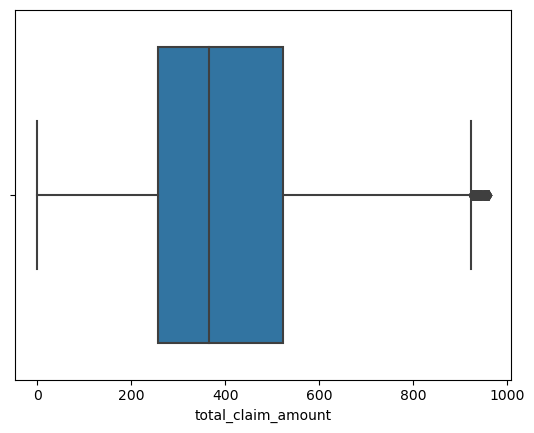

In [139]:
data = continuos_columns[(continuos_columns['total_claim_amount']>lower_limit) & (continuos_columns['total_claim_amount']<upper_limit)]
sns.boxplot(x=data['total_claim_amount'])
plt.show()

### 8. Checking NaN values

In [140]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [141]:
#There is no null vales the columns.